<h1>Проект Обучение с учителем<span class="tocSkip"></span></h1>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<h1>Отток клиентов<span class="tocSkip"></span></h1>

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Описание данных<span class="tocSkip"></span></h1>

Признаки
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак
- Exited — факт ухода клиента

## Подготовка данных

In [1]:
# Загружаем трубуемые библиотеки для нашей работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
# Читаем и записываем датасет в переменную data и выврдим первые 10 строк
# используем подход try & except для избежания ошибки, при открытии данных, расположенных по другому адресу

try:
    data = pd.read_csv('/Users/tbetterknow/Desktop/Яндекс_Практикум/12. Обучение с учителем/Churn (1).csv')
    
except:
    data = pd.read_csv('/datasets/Churn.csv')
    
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [222]:
# Изучаем датасет с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Датасет состоит из 14 столбцов с 10000 строк.
При первом анализе видно, что данные в столбце Tenure (сколько лет человек является клиентом банка) содержат пропуски, их нужно обработать. Предположим, что пропуск означает, что человек только что стал клиентом банка, поэтому заполним пропуски 0.

In [223]:
# Проверяем данные столбца Tenure с помощью value_counts
print(data['Tenure'].value_counts())

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64


In [224]:
# Считаем процент пропусков в столбце Tenure
print("Процент пропусков в столбце Tenure:", data['Tenure'].isnull().sum() / len(data) * 100)

Процент пропусков в столбце Tenure: 9.09


Принимаем решение об удалении строк с пропусками в столбце Tenure поскольку общий процент пропусков по отношению ко всем строкам 9% (не превышет 10%). Считаю, что заполнять данные медианным, и тем более уж средним значением будет неправильным решением, которые будут искажать результат.

Также, на вский случай записываем обновленный датафрейм после преобразований в новую переменную data_new.
Оставляем изначальный датафрейм на всякий случай.

In [225]:
# Удаляем пропуски и записываем новый датафрейм в новую переменную
data_new = data.dropna(subset=['Tenure'])

# Прверяем сделанные преобразования
data_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Также, проверим такие столбцы как CustomerID и Surname на наличие дубликатов.

In [226]:
data_new['CustomerId'][data_new['CustomerId'].duplicated()].count()

0

В столбце CustomerId дубликатов не обнаружено

In [227]:
data_new['Surname'][data_new['Surname'].duplicated()].count()

6304

В столбце Surname обнаружено 6304 дубликатов. Однако, учитывая тот факт, что в столбце CustomerId дубликатов не обнаружено, можно смело предположить, что найденные дубликаты - это однофамильцы. Тем самым, принимаем решение в удалении столбца Surname так как данные не представляют ценности для анализа данных, Также удаляем столбцы CustomerId и RowNumber за ненадобностью.

In [228]:
# Обозначим новый датафрейм "data_ml" — данные для машинного обучения
# Удалим столбцы, не представляющие ценности 
# создадим список for_drop = ['RowNumber', 'CustomerId', 'Surname']
drop = ['RowNumber', 'CustomerId', 'Surname']
data_ml = data_new.drop(drop, axis=1)
data_ml.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [229]:
# На всякий случай проверим сделанные преобразования (должно получиться 11 столбцов)
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


**Первичная подготовка данных в датасете выполнена.**
1) Мы заполнили пропуски в столбце Tenure

2) Проверили данные на наличие дубликатов в важных столбцах CustomerId и Surname, которые позволили нам заключить, что задвоенных данных в датасете нет

3) Удалили ненужные столбцы RowNumber, CustomerId и Surname, которые не представляют ценности

**Подготовка данных к анализу данных**

Целевой признак Exited — факт ухода клиента. 
Данный признак является категориальным, поэтому задача должны решаться методами классификации.

Данные подготовим методом OHE (one-hot-encoding), что позволит нам использовать модели, DecisionTreeClassifier, RandomForestClassifier и LogisticRegression.

- Столбец Geography имеет всего 3 уникальных значения France', 'Spain', 'Germany' — требуется выполнить преобразование OHE
- Столбец Gender имеет значение преобразовать — OHE
- Стобец Age — требуется проработка OHE
- Столбец Exited - требуется проработка OHE

In [230]:
# Используем метод pd.get_dummies с настройкой drop_first=True что позволит нам 
data_ml = pd.get_dummies(data_ml, drop_first=True)
data_ml.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [231]:
data_ml.shape

(9091, 12)

В новом датафрейме мы получили 13 столбцов.
Столбец Geography содержал 3 класса, Gender - 2 класса. Как результат, мы получили только 2 и 1 столбцов соответственно, что позволяет избежать дами-ловушки.

**Разделение датасета на выборки: обучающую (60%), валидационную (20%) и тестовую (20%)**

In [232]:
# Создаем признаки и целевой параметр
features = data_ml.drop('Exited', axis=1)
target = data_ml['Exited']

In [342]:
# Создаем валидационную выборку 60%
features_train, features_validtest, target_train, target_validtest = train_test_split(features,
                                                    target,
                                                    train_size=0.6,
                                                    random_state=12345,
                                                    stratify=target)

In [344]:
# Разделяем оставшиеся 40% на 2 равные части (валидационная 20% и тестовая 20%)
features_valid, features_test, target_valid, target_test = train_test_split(features_validtest,
                                                    target_validtest,
                                                    train_size=0.5,
                                                    random_state=12345)

In [345]:
# Проверяем корректность разбивки
print(features_train.shape, features_validtest.shape, target_train.shape, target_validtest.shape)

(4545, 11) (4546, 11) (4545,) (4546,)


In [346]:
# Проверяем корректность разбивки
print(features_valid.shape, target_valid.shape, features_test.shape, target_test.shape)

(2273, 11) (2273,) (2273, 11) (2273,)


Все преобразования (разделение на выборки) выполнены корректно.

**Стандартизация / масштабирование признаков**

Поскольку наши численные признаки имеют разные масштабы, требуется их стандартизация (масштабирование). Для этих целей будем использовать StandardScaller из sklearn.preprocessing (загружен в разделе 1) и стандартизируем признаки всех трех выборок (обучающей, валидационной, тестовой).

In [347]:
# Создаем список с численными признаками для стандартизации
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [348]:
# Создаем объект этой структуры и настраиваем его на обучающих данных:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [349]:
# Масштабируем численные признаки обучающей выборки 
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

/tmp/ipykernel_30/1382041671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
1496,-0.848067,-0.080742,1.031610,-1.218998,0.787562,0,0,-0.347510,0,1,1
3105,0.293363,-1.039143,-0.360512,-1.218998,0.787562,1,1,0.778706,0,0,0
7050,-0.617686,-0.943303,0.335549,-1.218998,0.787562,1,1,0.157617,0,0,1
6054,-0.177869,0.781819,-1.752634,-1.218998,-0.910478,1,1,-1.620950,0,0,0
3727,1.371962,-1.134983,0.683579,1.774280,-0.910478,1,1,1.311330,0,0,0


In [350]:
# Масштабируем численные признаки валидационной выборки 
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

/tmp/ipykernel_30/867471435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_valid[numeric] = scaler.transform(features_valid[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2884,-0.314003,-0.943303,-0.708543,-1.218998,0.787562,0,1,0.934577,0,0,0
6642,-0.638630,-0.176582,0.335549,1.003160,-0.910478,0,1,-1.401184,0,0,0
195,1.644230,-0.368262,-0.708543,1.585460,-0.910478,1,1,-1.720747,0,0,1
2558,0.806483,-0.847463,1.031610,0.690760,0.787562,1,1,0.665403,1,0,0
5591,-1.162222,-0.080742,-0.012482,-1.218998,0.787562,1,0,-0.907632,0,0,1


In [351]:
# Масштабируем численные признаки тестовой выборки 
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

/tmp/ipykernel_30/2484108848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5802,-1.581095,-0.368262,1.727671,-1.218998,0.787562,1,0,-1.544837,0,0,1
8473,1.256772,-0.559942,0.335549,-1.218998,0.787562,1,1,0.460827,0,0,0
7402,-0.031263,-0.559942,0.683579,0.726587,0.787562,1,0,-0.389259,0,1,1
3590,0.282892,-0.176582,-0.708543,0.198761,-0.910478,0,1,0.318572,0,0,1
4453,1.665174,-0.559942,1.031610,1.156514,-0.910478,0,0,1.730711,1,0,1


После стандартизации численных признаков каждой выборки мы вывели первые 5 строк для подтверждения, что все преобразования выполнены. Следующим шагом переходим к исследованию задачи.

## Исследование задачи

**Обучение моделей**

Для исследования задачи будем обучать три модели: DecisionTreeClassifier (DTC), RandomForestClassifier (RFC), LogisticRegression (LgR). Все требуемые библиотеки импортировали в разделе 1, включая метрики для расчета точности моделей (accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, roc_curve).

In [352]:
# Создадим функцию all_models_accuracy для обучения всех трех моделей, а также для отображения их точности
def all_models_accuracy(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=12345)
    DTC_score = model_DTC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 100)
    RFC_score = model_RFC.fit(features_train, target_train).score(features_valid, target_valid)
    
    model_LgR = LogisticRegression(random_state=12345, solver = 'liblinear')
    LgR_score = model_LgR.fit(features_train, target_train).score(features_valid, target_valid)
    print("Accuracy:" "Дерево решений", DTC_score, "Accuracy:" "Случайный лес ", RFC_score, "Accuracy:" "Логистческая регрессия", LgR_score)

all_models_accuracy(features_train, target_train, features_valid, target_valid)

Accuracy:Дерево решений 0.788825340959085 Accuracy:Случайный лес  0.8649362076550814 Accuracy:Логистческая регрессия 0.8139023317201936


In [353]:
# Проверяем баланс классов обучающей выборки
target_train.value_counts(normalize = True)

0    0.79604
1    0.20396
Name: Exited, dtype: float64

In [354]:
# Проверяем баланс классов валидационной выборки
target_valid.value_counts(normalize = True)

0    0.792345
1    0.207655
Name: Exited, dtype: float64

Можно сделать вывод, что у обучающией и валидационной выборок присутствует заметный дисбаланс класов. Ответы 0 получаются примерно в 80%, а ответы 1 в примерно 20%
Можно предположить, что результаты предсказаний моделей будут сильно склоняться к одному варианту ответов.

**Проверяем адекватность моделей**

In [355]:
# Создадим функцию all_models_share для обучения всех трех моделей, а также для отображения их точности

def all_models_share(features_train, target_train, features_valid, target_valid):
    model_DTC = DecisionTreeClassifier(random_state=12345)
    model_DTC.fit(features_train, target_train)
    DTC_share = pd.Series(model_DTC.predict(features_valid)).value_counts(normalize = 1)
    
    model_RFC = RandomForestClassifier(random_state=12345, n_estimators = 100)
    model_RFC.fit(features_train, target_train)
    RFC_share = pd.Series(model_RFC.predict(features_valid)).value_counts(normalize = 1)
    
    model_LgR = LogisticRegression(random_state=12345, solver = 'liblinear')
    model_LgR.fit(features_train, target_train)
    LgR_share = pd.Series(model_LgR.predict(features_valid)).value_counts(normalize = 1)
       
    print("Доли ответов:" "дерево решений", DTC_share, "случайный лес ", RFC_share, "логистческая регрессия", LgR_share, end='')

all_models_share(features_train, target_train, features_valid, target_valid)

Доли ответов:дерево решений 0    0.789705
1    0.210295
dtype: float64 случайный лес  0    0.876375
1    0.123625
dtype: float64 логистческая регрессия 0    0.924769
1    0.075231
dtype: float64

Логистичесая регрессия показывает самую высокую точность, но данная модель выдает резудлтат 0 в 92% 
Необходимо сравнить качество предсказаний с константной моделью. За константу примем пример 0.

In [356]:
# Создаем константную модель
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.shape

(2273,)

In [357]:
# Расчитываем точность предсказаний константной модели
accuracy_score_constant = accuracy_score(target_valid, target_predict_constant)
accuracy_score_constant

0.7923449186097669

**Accuracy моделей:**
- дерево решений 0.7888 
- случайный лес 0.8649
- логистческая регрессия 0.8139
- Точность константной модели: 0.7923

Точность всех моделей схожа с точностью константной, что указывает на дисбаланс классов. Классы несбалансированны, когда их соотношение далеко от 1:1.

Чтобы разобраться подбробнее, нам поможет матрица ошибок для каждой модели.

**Матрица ошибок для DecisionTreeClassifier**

In [358]:
# Создаем матрицу ошибок для DTC
model_DTC = DecisionTreeClassifier(random_state=12345)
model_DTC.fit(features_train, target_train)
DTC_prediction = model_DTC.predict(features_valid)
DTC_probabilities_valid = model_DTC.predict_proba(features_valid)
DTC_probabilities_one_valid = DTC_probabilities_valid[:, 1]
confusion_matrix(target_valid, DTC_prediction)


array([[1558,  243],
       [ 237,  235]])

TN = 1558  FP = 243
FN = 237   TP = 235
Дерево решений склонно выдавать очень высокое количество истинно отрицательных ответов (TN). Изучим полноту, точность и F1-меру

In [359]:
# Создаем функцию для вывода всех параметров
def rec_prec_f1(target_valid, prediction, probabilities_one_valid):
    print("Полнота" , recall_score(target_valid, prediction))
    print("Точность", precision_score(target_valid, prediction))
    print("F1-мера", f1_score(target_valid, prediction))
    print("AUC-ROC", roc_auc_score(target_valid, DTC_probabilities_one_valid))

# Полнота, точность и F1-мера для DTC
rec_prec_f1(target_valid, DTC_prediction, DTC_probabilities_one_valid)

Полнота 0.4978813559322034
Точность 0.4916317991631799
F1-мера 0.4947368421052632
AUC-ROC 0.681478157144336


Низкое значние F1- меры свидетельствует о низком качестве модели, проблема в точности.

**Матрица ошибок для RandomForestClassifier**

In [360]:
# Создаем матрицу ошибок для RFC
model_RFC = RandomForestClassifier(random_state=12345)
model_RFC.fit(features_train, target_train)
RFC_prediction = model_RFC.predict(features_valid)
RFC_probabilities_valid = model_RFC.predict_proba(features_valid)
RFC_probabilities_one_valid = RFC_probabilities_valid[:, 1]
confusion_matrix(target_valid, RFC_prediction)


array([[1743,   58],
       [ 249,  223]])

TN = 1743 FP = 58 FN = 249 TP = 223 У случайного леса идеентичная ситуация, очень высокое количество истинно отрицательных ответов (TN). Изучим полноту, точность и F1-меру

In [361]:
# Полнота, точность и F1-мера для RFC
rec_prec_f1(target_valid, RFC_prediction, RFC_probabilities_one_valid)

Полнота 0.4724576271186441
Точность 0.7935943060498221
F1-мера 0.5922974767596282
AUC-ROC 0.681478157144336


У Случайного леса показатели немного выше, чем у Дерева решений, однако все равно F1 достаточно низок, что указывает на низкое качество модели.

**Матрица ошибок для LogisticRegression**

In [362]:
# Создаем матрицу ошибок для LgR
model_LgR = LogisticRegression(random_state=12345, solver = 'liblinear')
model_LgR.fit(features_train, target_train)
LgR_prediction = model_LgR.predict(features_valid)
confusion_matrix(target_valid, LgR_prediction)

array([[1740,   61],
       [ 362,  110]])

TN = 1740 FP = 61 FN = 362 TP = 110 Похожая ситуация, очень высокое количество истинно отрицательных ответов (TN).


Для логистической регрессии также расчитаем метрику AUC-ROC и построим график roc_curve (roc кривая).

In [363]:
LgR_probabilities_one_valid = model_LgR.predict_proba(features_valid)[:, 1]
auc_roc_LgR = roc_auc_score(target_valid, LgR_probabilities_one_valid)
auc_roc_LgR

0.7736885816730819

Показатель AUC_ROC у Логистической Регрессии лучше чем у других моделей.

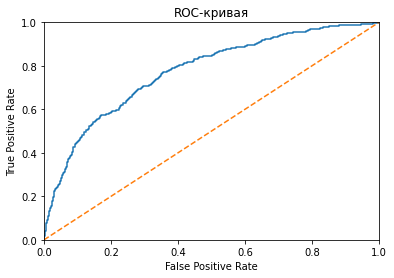

In [364]:
# Строим график roc кривой
fpr, tpr, thresholds = roc_curve(target_valid, LgR_probabilities_one_valid) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

score 0.7021557413110426
AUC-ROC 0.7758483987238729


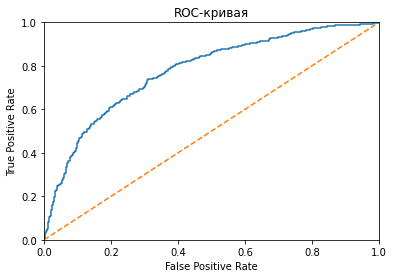

In [365]:
# Попробуем обучить логистическую регресию сбалансировав классы, уазав параметр class_weight='balanced'
model_LgR = LogisticRegression(random_state=12345, solver = 'liblinear', class_weight='balanced')
model_LgR.fit(features_train, target_train)
LgR_probabilities_one_valid_class_weight = model_LgR.predict_proba(features_valid)[:, 1]
print("score", model_LgR.score(features_valid, target_valid))
print("AUC-ROC", roc_auc_score(target_valid, LgR_probabilities_one_valid_class_weight))

fpr, tpr, thresholds = roc_curve(target_valid, LgR_probabilities_one_valid_class_weight) 
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Показатели сильно не изменились.
Логистическая регрессия выдает высокий процент истинно ложных предсказаний.
Налицо несбалансированность. Перейдем к формированию сбалансированных выборок.

## Борьба с дисбалансом

**Применяем подход upsampling**

Как мы выяснили ранее в нашей выборке истинно ложных ответов около 80%, истинно положитительных около 20%.
Нам необходмо увеличить количество истинно положительных ответов в 4 раза для достижения баланса.

In [366]:
# Ознакомимся с первоначальным распределением классов
target_train.value_counts(normalize = True)

0    0.79604
1    0.20396
Name: Exited, dtype: float64

In [367]:
target_train.shape

(4545,)

<AxesSubplot:ylabel='Frequency'>

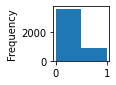

In [368]:
target_train.plot(kind ='hist', bins=2, figsize=(1,1))

Наглядно виден дисбаланс.

In [369]:
# Создаем функцию для увеличения класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    else:
        features_upsampled = 0
        target_upsampled = 0  
        
        
       
    return features_upsampled, target_upsampled
  

In [172]:
#Протестируем функцию (верное значение)
# features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 0)
#print(target_train_upsampled.value_counts(normalize = 1))
#print(target_train_upsampled.shape)

In [173]:
#Протестируем функцию (верное значение)
#features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 3)
#features_train_upsampled

In [370]:
#применим функцию upsample 
#увеличим количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(features_train, target_train, 4, 1)
print(target_train_upsampled.value_counts(normalize = True))
print(target_train_upsampled.shape)

1    0.506143
0    0.493857
Name: Exited, dtype: float64
(7326,)


<AxesSubplot:ylabel='Frequency'>

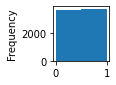

In [371]:
target_train_upsampled.plot(kind ='hist', bins=2, figsize=(1,1))

Теперь данные сбалансированы. Перейдем к обучению моделей на новых данных.

**Обучение моделей на сбаланированной выборке**

Точность (accuracy_score)

In [372]:
# Accuracy моделей на выборке с дисбалансом
all_models_accuracy(features_train, target_train, features_valid, target_valid)

Accuracy:Дерево решений 0.788825340959085 Accuracy:Случайный лес  0.8649362076550814 Accuracy:Логистческая регрессия 0.8139023317201936


In [373]:
# Accuracy моделей на сбалансированной выборке
all_models_accuracy(features_train_upsampled, target_train_upsampled, features_valid, target_valid)

Accuracy:Дерево решений 0.798064232292125 Accuracy:Случайный лес  0.8526176858776947 Accuracy:Логистческая регрессия 0.7003959524857017


Точность моделей изменились незначительно, причем в меньшую сторону, но проверим изменилось ли качество ответов.

Качество предсказаний

In [374]:
# Решающее дерево
model_DTC_upsampled = DecisionTreeClassifier(random_state=12345)
model_DTC_upsampled.fit(features_train_upsampled, target_train_upsampled)
DTC_prediction_upsampled = model_DTC_upsampled.predict(features_valid)
rec_prec_f1(target_valid, DTC_prediction_upsampled, DTC_probabilities_one_valid)


Полнота 0.4809322033898305
Точность 0.5147392290249433
F1-мера 0.49726177437020813
AUC-ROC 0.681478157144336


In [375]:
# Случайный лес
model_RFC_upsampled = RandomForestClassifier(random_state=12345, n_estimators = 100)
model_RFC_upsampled.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction_upsampled = model_RFC_upsampled.predict(features_valid)
rec_prec_f1(target_valid, RFC_prediction_upsampled, RFC_probabilities_one_valid)

Полнота 0.538135593220339
Точность 0.6846361185983828
F1-мера 0.6026097271648873
AUC-ROC 0.681478157144336


In [376]:
# Логистическая регрессия
model_LgR_upsampled = LogisticRegression(solver = 'liblinear')
model_LgR_upsampled.fit(features_train_upsampled, target_train_upsampled)
LgR_prediction_upsampled = model_LgR_upsampled.predict(features_valid)
rec_prec_f1(target_valid, LgR_prediction_upsampled, LgR_probabilities_one_valid)

Полнота 0.711864406779661
Точность 0.3813847900113507
F1-мера 0.4966740576496675
AUC-ROC 0.681478157144336


Только показаели модели Случайного леса улучшились.
Показатель F1 меры = 0.61, что выше требуемого значения.
Попробуем улучшить модель путем изменения параметров.

Сделаем несколько попыток поиска наилучших надстроек гиперпараметров

In [184]:
# Импортируем требуемую библиотеку GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 20, 30],
          'max_depth': [10, 50, 100, None],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

grid = GridSearchCV(model_RFC_upsampled, params, cv=5)

# Поскольку модель достаточно долго прогоняла все параметры, применим способ, показывающий статус прогресса tqdm
for search in tqdm([grid]):
    search.fit(features_train, target_train)

print("Best Parameters: ", grid.best_params_)

100%|██████████| 1/1 [00:46<00:00, 46.82s/it]

Best Parameters:  {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}


In [377]:
# Первая надстройка и использование параметров, найденных GridSearchCV
model_RFC_finetuned = RandomForestClassifier(max_depth=50, 
                                             min_samples_leaf=2, 
                                             min_samples_split=10, 
                                             n_estimators=30)
model_RFC_finetuned.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction_final = model_RFC_finetuned.predict(features_valid)
rec_prec_f1(target_valid, RFC_prediction_final, RFC_probabilities_one_valid)

Полнота 0.6016949152542372
Точность 0.6120689655172413
F1-мера 0.6068376068376068
AUC-ROC 0.681478157144336


In [187]:
# Добавляем параметры 'bootstrap' и 'max_features'

params = {'n_estimators': [10, 20, 30],
          'max_depth': [10, 50, 100, None],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'bootstrap': [True, False],
          'max_features': ['log2', 'sqrt']}

grid = GridSearchCV(model_RFC_upsampled, params, cv=5)

# Поскольку модель достаточно долго прогоняла все параметры, применим способ, показывающий статус прогресса tqdm
for search in tqdm([grid]):
    search.fit(features_train, target_train)

print("Best Parameters: ", grid.best_params_)

100%|██████████| 1/1 [03:35<00:00, 215.86s/it]

Best Parameters:  {'bootstrap': False, 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}


In [378]:
# Вторая надстройка и использование параметров, найденных GridSearchCV
# Добавили к списку параметров 'bootstrap' и 'max_features'
model_RFC_finetuned = RandomForestClassifier(bootstrap=False, 
                                             max_depth=50, 
                                             max_features='log2', 
                                             min_samples_leaf=4, 
                                             min_samples_split=10, 
                                             n_estimators=20)
model_RFC_finetuned.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction_final = model_RFC_finetuned.predict(features_valid)
rec_prec_f1(target_valid, RFC_prediction_final, RFC_probabilities_one_valid)

Полнота 0.586864406779661
Точность 0.6502347417840375
F1-мера 0.6169265033407573
AUC-ROC 0.681478157144336


In [189]:
# Изменяем параметр cv с 5 на 3

params = {'n_estimators': [10, 20, 30],
          'max_depth': [10, 50, 100, None],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'bootstrap': [True, False],
          'max_features': ['log2', 'sqrt']}

grid = GridSearchCV(model_RFC_upsampled, params, cv=3)

# Поскольку модель достаточно долго прогоняла все параметры, применим способ, показывающий статус прогресса tqdm
for search in tqdm([grid]):
    search.fit(features_train, target_train)

print("Best Parameters: ", grid.best_params_)

100%|██████████| 1/1 [01:54<00:00, 114.91s/it]

Best Parameters:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 30}


In [384]:
# Третья надстройка и использование параметров, найденных GridSearchCV
# Изменили параметр cv с 5 на 3
model_RFC_finetuned = RandomForestClassifier(bootstrap=False, 
                                             max_depth=10, 
                                             max_features='log2', 
                                             min_samples_leaf=1, 
                                             min_samples_split=10, 
                                             n_estimators=30)
model_RFC_finetuned.fit(features_train_upsampled, target_train_upsampled)
RFC_prediction_final = model_RFC_finetuned.predict(features_valid)
rec_prec_f1(target_valid, RFC_prediction_final, RFC_probabilities_one_valid)

Полнота 0.635593220338983
Точность 0.5725190839694656
F1-мера 0.6024096385542168
AUC-ROC 0.681478157144336


Принимаем решение использовать параметры, полученные в третьей попытке, а именно:
- bootstrap=True
- max_depth=100
- max_features='sqrt'
- min_samples_leaf=1
- min_samples_split=10
- n_estimators=20

При данных гиперпараметрах мы получили наивысший уровень меры F1 = 0.6024

**Проверим финальную модель на адекватность**

In [385]:
# Создаем константную модель
target_predict_constant = pd.Series([0]*len(target_valid))
target_predict_constant.value_counts()

0    2273
dtype: int64

In [386]:
# Сравниваем показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(target_valid, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(target_valid, RFC_prediction_final))
#Дополнительно сравним AUC-ROC — единственный параметр подающийся сравнению, потому что константная подель содержит только негативные ответы
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_valid, RFC_prediction_final))

accuracy_score константой модели: 0.7923449186097669
accuracy_score финальной модели: 0.825780906291245
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.7556089366547776


Наша финальная модель показывает показатели accuracy и AUC-ROC выше, чем у константной модели.
Можно считать, что наша модель прошла проверку на адекватность.

**Вывод по результатам исследования**

В изначальных данных наблюдался значительный дисбаланс (около 80% ответов целевого признака были истинно ложными и только 20% истинно положительными), из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели не первоначальных данных характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1) — модели показывали низкие результаты точности и полноты.

Мы устранили дисбаланс классов в обучающей выборки методом upsampling — увеличили количество значений позитивного класса в 4 раза. Так мы достигли баланса классов в обучеющей выборки: 1 = 0.50, 0 = 0.49.

На новых данных все модели показали результат выше, чем на несбалансированной выборке. Мы получили следующие результаты:
- Полнота 0.538135593220339
- Точность 0.6846361185983828
- F1-мера 0.6026097271648873
- AUC-ROC 0.681478157144336

Было принято решение попробовать улучшить рещультаты модели RandomForestClassifier путем автоматической подборки лучших гиперпараметров, используя GridSearchCV.

Мы подбирали следующие гиперпараметры:
- n_estimators': [10, 20, 30],
- max_depth': [10, 50, 100, None],
- min_samples_split': [2, 5, 10],
- min_samples_leaf': [1, 2, 4],
- bootstrap': [True, False],
- max_features': ['log2', 'sqrt']}

Финальные параметры выбранной модели RandomForestClassifier:
- bootstrap=False, 
- max_depth=10, 
- max_features='log2', 
- min_samples_leaf=1, 
- min_samples_split=10
- n_estimators=30

При данных параметрах мы получили следующие результаты:
- Полнота 0.635593220338983
- Точность 0.5725190839694656
- F1-мера 0.6024096385542168
- AUC-ROC 0.681478157144336


Финальная модель прошла проверку на адекватность в сравнении с контантной моделью: 
- accuracy_score константой модели: 0.7923449186097669
- accuracy_score финальной модели: 0.825780906291245
- AUC-ROC константой модели: 0.5
- AUC-ROC финальной модели: 0.7556089366547776

## Тестирование модели

In [387]:
model_RFC_finetuned
RFC_prediction_final = model_RFC_finetuned.predict(features_test)
rec_prec_f1(target_test, RFC_prediction_final, RFC_probabilities_one_valid)

Полнота 0.6725274725274726
Точность 0.5614678899082569
F1-мера 0.612
AUC-ROC 0.5004339994439004


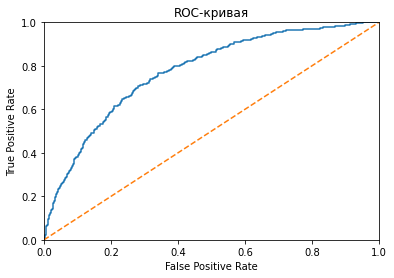

In [388]:
final_model_probabilities_one = model_LgR.predict_proba(features_test)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, final_model_probabilities_one) 

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Выгрузка результата

In [389]:
results = pd.DataFrame(RFC_prediction_final)
results.head(40)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,1


**ВЫВОД**

Наша финальная модель получила результат метрики F1 > 0.59.
Модель показывает высокий показателем полноты = 0.65 (min = 0, max = 1), поэтому она с высокой вероятностью предскажит уход клиента из банка.
Показатель точности не высокий = 0.56 (min = 0, max = 1) — модель верно предсказывает примерно половину ухода клиентов.
Для банковских маркетологов данная модель вполне может служить хорошим инструментом для прогнозирования ухода клиента.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*